# 유방암 여부를 진단하기

## 패키지 불러오기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
cancer = load_breast_cancer()

## 데이터 뜯어보기

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#cancer.DESCR

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer.data.shape  # 569개의 데이터셋, 30개의 feature

(569, 30)

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
len(cancer.feature_names)

30

In [9]:
cancer.target  # 암 여부를 0과 1로 판단함 (이중분류)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
cancer.target_names  # malignant : 악성의,   benign : 양성의

array(['malignant', 'benign'], dtype='<U9')

In [11]:
cancer.filename

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

## DataFrame 만들기

In [12]:
import pandas as pd

In [13]:
cancer_df = pd.read_csv(cancer.filename)
cancer_df

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [14]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
cancer_df.shape

(569, 30)

In [16]:
cancer_label_df = pd.DataFrame(cancer.target, columns=['label'])
cancer_label_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [17]:
cancer_df = pd.concat([cancer_df, cancer_label_df],axis=1)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [18]:
cancer_df.shape

(569, 31)

In [19]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
cancer_df[cancer.feature_names[0:15]].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130


In [21]:
cancer_df[cancer.feature_names[15:30]].describe()

,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [22]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

## feature, label 분리
- 순수한 모델의 성능을 알아보기 위해 feature의 가공은 최소화할 예정

In [23]:
x = cancer_df.drop('label', axis=1)
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [24]:
y = cancer_df['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

## 스케일링

In [25]:
x.values.max()  # 값 중 가장 큰 값은 4,254

4254.0

In [26]:
x.values.min()  # 값 중 가장 작은 값은 0

0.0

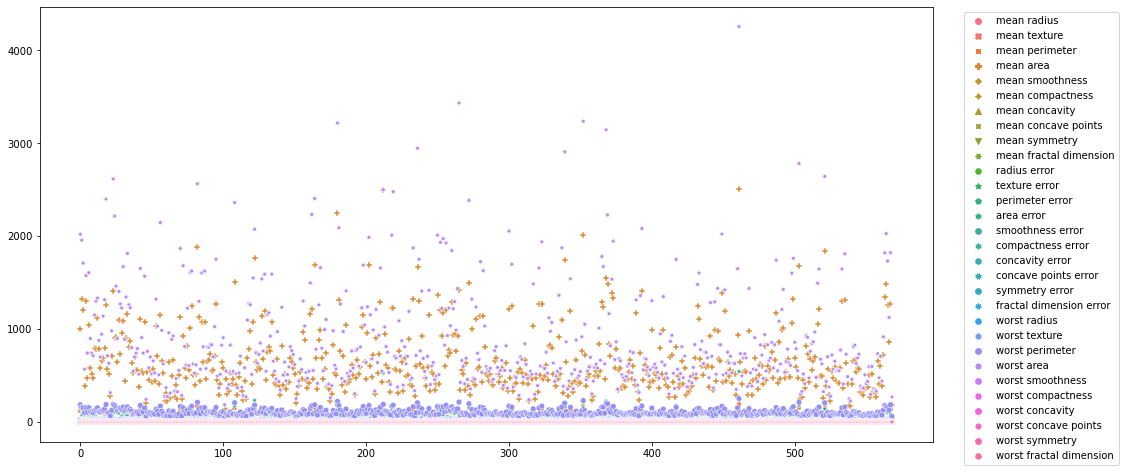

In [27]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data=x)
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

스케일링이 필요한 이유
- 각 feature간 데이터 값 크기의 격차가 매우 심하게 나타남
- 값의 크기가 모델의 학습에 영향을 주기 때문에 데이터의 범위를 같은 조건으로 만들어줄 필요가 있음
- outlier 데이터가 심하여 MinMaxScaler를 이용

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()

In [30]:
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

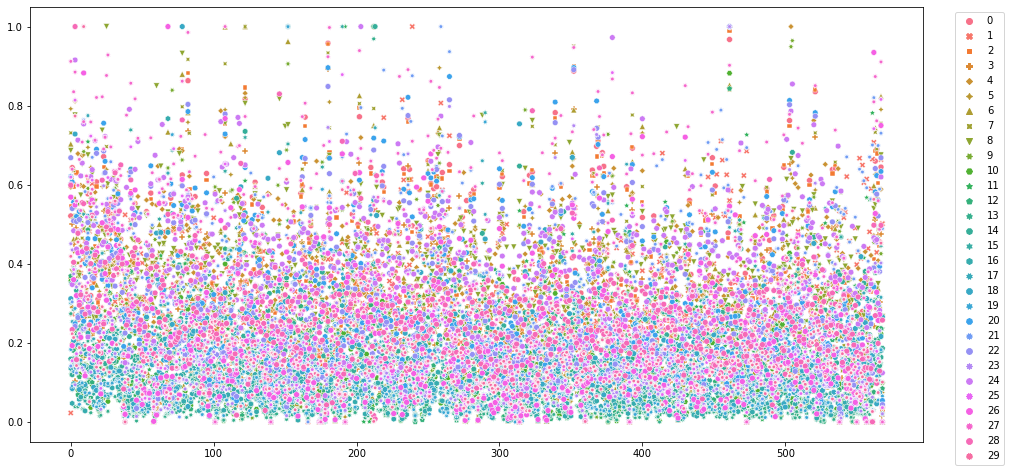

In [31]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data=x_scaled)
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

## train, test셋 분리

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=95)

In [34]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [35]:
y_train.shape, y_test.shape

((455,), (114,))

## 모델 적용

### 1. Decision Tree Classifier

#### 1-1. 모델 생성

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_cf = DecisionTreeClassifier(random_state=95)
dt_cf

DecisionTreeClassifier(random_state=95)

#### 1-2. 모델 학습

In [38]:
dt_cf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=95)

#### 1-3. 학습을 토대로 test

In [39]:
pred_test_dt_cf = dt_cf.predict(x_test)

#### 1-4. 모델 평가

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [41]:
score_test = (y_test == pred_test_dt_cf).mean()

In [42]:
score_test

0.8947368421052632

In [43]:
dt_cf.score(x_train, y_train), dt_cf.score(x_test, y_test)  # Overfitting

(1.0, 0.8947368421052632)

In [44]:
print(classification_report(y_test, pred_test_dt_cf))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.91      0.93      0.92        72

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



### 2. Random Forest Classifier

#### 2-1. 모델 생성

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_cf = RandomForestClassifier(random_state=95)
rf_cf

RandomForestClassifier(random_state=95)

#### 2-2. 모델 학습

In [47]:
rf_cf.fit(x_train, y_train)

RandomForestClassifier(random_state=95)

#### 2-3. 학습을 토대로 test

In [48]:
pred_test_rf_cf = rf_cf.predict(x_test)

#### 2-4. 모델 평가

In [49]:
score_test = (y_test == pred_test_rf_cf).mean()

In [50]:
score_test

0.9473684210526315

In [51]:
rf_cf.score(x_train, y_train), rf_cf.score(x_test, y_test)

(1.0, 0.9473684210526315)

In [52]:
print(classification_report(y_test, pred_test_rf_cf))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### 3. svm (Support Vector Machine)

#### 3-1. 모델 생성

In [53]:
from sklearn import svm

In [54]:
model_svm = svm.SVC(random_state=95)
model_svm

SVC(random_state=95)

#### 3-2. 모델 학습

In [55]:
model_svm.fit(x_train, y_train)

SVC(random_state=95)

#### 3-3. 학습을 토대로 test

In [56]:
pred_test_model_svm = model_svm.predict(x_test)

#### 3-4. 모델 평가

In [57]:
score_test = (y_test == pred_test_model_svm).mean()

In [58]:
score_test

0.9649122807017544

In [59]:
model_svm.score(x_train, y_train), model_svm.score(x_test, y_test)

(0.9868131868131869, 0.9649122807017544)

In [60]:
print(classification_report(y_test, pred_test_model_svm))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### 4. SGDClassifier (Stochastic Gradient Descent Classifier, 확률적 경사 하강법)

#### 4-1. 모델 생성

In [61]:
from sklearn.linear_model import SGDClassifier

In [62]:
SGD_cf = SGDClassifier(random_state=95)
SGD_cf

SGDClassifier(random_state=95)

#### 4-2. 모델 학습

In [63]:
SGD_cf.fit(x_train, y_train)

SGDClassifier(random_state=95)

#### 4-3. 학습을 토대로 test

In [64]:
pred_test_SGD_cf = SGD_cf.predict(x_test)

#### 4-4. 모델 평가

In [65]:
score_test = (y_test == pred_test_SGD_cf).mean()

In [66]:
score_test

0.956140350877193

In [67]:
SGD_cf.score(x_train, y_train), SGD_cf.score(x_test, y_test)

(0.9824175824175824, 0.956140350877193)

In [68]:
print(classification_report(y_test, pred_test_SGD_cf))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### 5. Logistic Regression

#### 5-1. 모델 생성

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(random_state=95)
lr

LogisticRegression(random_state=95)

#### 5-2. 모델 학습

In [71]:
lr.fit(x_train, y_train)  # max_iter의 디폴트 값인 100번동안 결과값에 수렴하지 못해서 경고 발생

LogisticRegression(random_state=95)

In [72]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=95)

#### 5-3. 학습을 토대로 test

In [73]:
pred_test_lr = lr.predict(x_test)

#### 5-4. 모델 평가

In [74]:
score_test = (y_test == pred_test_lr).mean()

In [75]:
score_test

0.9385964912280702

In [76]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.9692307692307692, 0.9385964912280702)

In [77]:
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        42
           1       0.91      1.00      0.95        72

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## 모델 비교

- 순수 모델 성능을 보기 위해 하이퍼 파라미터는 최대한 디폴트 값으로 지정
- 성능은 train_test_split의 분류에 따라 달라질 수 있음
- label의 항목들 사이즈가 약간씩 다른 것을 적용하기 위해 평균은 weighted avg를 이용함

평가 항목
- macro avg : 각 항목을 더한 후, 전체에 대한 평균을 구하는 방식 (레이블의 비율은 고려되지 않음)
- weighted avg : 각 레이블의 비율에 따라 가중치를 적용한 평균을 구하는 방식  
(macro avg, weighted avg : https://rython.tistory.com/14)
<br><br>
- precision(정밀도) : TP / (TP+FP), 모델이 True로 분류한 것 중 실제 True로 분류된 비율
- recall(재현율, 민감도) : TP / (TP+FN), 실제 True로 분류된 것 중 모델이 True로 분류한 비율
- accuracy(정확도) : (TP + TN) / (TP + FN + FP +TN), 전체에서 모델이 맞게 예측한 비율 
- F1-score : precision과 recall의 조화평균

In [78]:
model_list = [pred_test_dt_cf, pred_test_rf_cf, pred_test_model_svm, pred_test_SGD_cf, pred_test_lr]

In [79]:
model_name = ['DecisionTree', 'RandomForest', 'svm', 'SGDClassifier', 'LogisticRegression']

In [80]:
acc_list = []
for i in model_list:
    acc = round(accuracy_score(y_test, i), 2)
    acc_list.append(acc)
acc_list

[0.89, 0.95, 0.96, 0.96, 0.94]

In [81]:
recall_list = []
for i in model_list:
    rec = round(recall_score(y_test, i, average='weighted'), 2)
    recall_list.append(rec)
recall_list

[0.89, 0.95, 0.96, 0.96, 0.94]

In [82]:
precision_list = []
for i in model_list:
    rec = round(precision_score(y_test, i, average='weighted'), 2)
    precision_list.append(rec)
precision_list

[0.89, 0.95, 0.97, 0.96, 0.94]

In [83]:
f1_list = []
for i in model_list:
    f1 = round(f1_score(y_test, i, average='weighted'), 2)
    f1_list.append(f1)
f1_list

[0.89, 0.95, 0.96, 0.96, 0.94]

In [84]:
import pandas as pd

In [85]:
score_df = pd.DataFrame([acc_list, recall_list, precision_list, f1_list], 
                        index=['accuracy', 'recall', 'precision', 'f1'], columns=model_name)

In [86]:
score_df = score_df.transpose()
score_df

,accuracy,recall,precision,f1
DecisionTree,0.89,0.89,0.89,0.89
RandomForest,0.95,0.95,0.95,0.95
svm,0.96,0.96,0.97,0.96
SGDClassifier,0.96,0.96,0.96,0.96
LogisticRegression,0.94,0.94,0.94,0.94


## 평가

### 1. 기초적인 평가 (accuracy)

In [87]:
score_df.sort_values(by='accuracy', ascending=False)['accuracy']

svm                   0.96
SGDClassifier         0.96
RandomForest          0.95
LogisticRegression    0.94
DecisionTree          0.89
Name: accuracy, dtype: float64

- accuracy로 볼 때는 svm과 SGDClassifier가 가장 좋은 성능을 보임

### 2. 유방암을 진단할때 (recall)
- 실제 유방암 환자를 유방암 환자라고 진단한 비율
- 실제 유방암 환자 10명 중, 유방암 환자 7명을 진단했을 때
- 3명의 유방암 환자는 유방암에 걸렸지만 유방암으로 진단받지 못해서 큰 위험에 빠짐
- recall의 관점에서 해당 문제를 바라봐야함

In [88]:
score_df.sort_values(by='recall', ascending=False)['recall']

svm                   0.96
SGDClassifier         0.96
RandomForest          0.95
LogisticRegression    0.94
DecisionTree          0.89
Name: recall, dtype: float64

- recall의 관점으로 볼 때는 **svm**과 **SGDClassifier**가 가장 좋은 성능을 보임